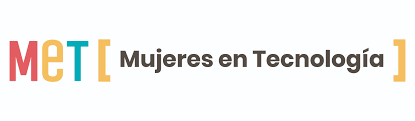

 ***METLAB-GRUPO-1***
 

 
<a id="ref7"></a>
### **Tabla de Contenido**

* <p><a href ="#ref1" > 1) Descripción del Problema </a></p>
* <p><a href ="#ref2" > 2) Descripción de los datos </a></p>
* <p><a href ="#ref3" > 3) Depuración de los datos </a></p>
* <p><a href ="#ref4" > 4) Análisis exploratorio y descriptivo</a></p>
* <p><a href ="#ref5" > 5) Modelación </a></p>
* <p><a href ="#ref6" > 6) Evaluación de Modelos </a></p>
* <p><a href ="#ref8" > 7) Conclusión</a></p>



*AGOSTO 2022*

<img src="https://m.media-amazon.com/images/I/41fl78jphsL.jpg" width=300, align ="center">

<a id="ref1"></a>
# 1) **Descripción del Problema**
* <p><a href ="#ref7"> <font color=orange size=3> Inicio </font> </a></p>
## 1--> Descripción General Data Frame

En esta competencia, su tarea es predecir si un pasajero fue transportado a una dimensión alternativa durante la colisión de la nave espacial Titanic con la anomalía del espacio-tiempo. Para ayudarlo a hacer estas predicciones, se le da un conjunto de registros personales recuperados del sistema informático dañado de la nave.

## **Descripcion de archivo de Entrenamiento y Test**

El archivo ***train.csv*** esta compuesto por los registros personales de aproximadamente dos tercios alrededor de 8700 pasajeros, que se utilizarán como datos de entrenamiento.


El archivo ***test.csv*** son los registros personales para el tercio restante alrededor de 4300 pasajeros, que se utilizarán como datos de prueba.

## *Su tarea es predecir el valor de para los pasajeros en este conjunto. Transported*

## **Descripciones de campos**

**PassengerId** - Un ID único para cada pasajero. Cada ID toma la forma donde indica un grupo con el que viaja el pasajero y es su número dentro del grupo. Las personas en un grupo a menudo son miembros de la familia, pero no siempre.gggg_ppggggpp

**HomePlanet** - El lugar del que partió el pasajero, típicamente su lugar de residencia permanente.

**CryoSleep** - Indica si el pasajero eligió ser puesto en animación suspendida durante la duración del viaje. Los pasajeros en criosueño están confinados en sus cabinas.

**Cabin** - El número de cabina donde se aloja el pasajero. Toma la forma deck/num/side, donde side puede ser ya sea P para babor o S para estribor.

**Destination** - El planeta al que el pasajero desembarcará.

**Age** - La edad del pasajero.

**VIP **- Si el pasajero ha pagado por un servicio VIP especial durante el viaje.

**RoomService**, **FoodCourt**, **ShoppingMall,** **Spa**, **VRDeck** - Registran el monto que el pasajero a gastado en cada una de estas comodidades a las que tiene acceso, de acuerdo al villete que compro para la nave espacial Titanic.

**Name** - El nombre y apellidos del pasajero.

## **Variable Objetivo**

**Transported** - Si el pasajero fue transportado por error a otra dimensión. 0 No fue transportado, 1 Transportado. Este es el objetivo, la columna que estás tratando de predecir.

## **Descripcion de archivo Predicciones**
El resultado de las predicciones para cada pasajero, Verdadero o Falso; se cargan en el archivo ***sample_submission.csv*** que se envia a la competencia y tiene el siguiente formato

**PassengerId** - Id para cada pasajero en el conjunto de prueba.

**Transported** - El objetivo. Para cada pasajero, prediga True o False


<a id="ref2"></a>
# 2) **Descripción de los datos**
* <p><a href ="#ref7"> <font color=orange size=3> Inicio </font> </a></p>

## **Librerias**

In [18]:
#!pip install missingno

In [19]:
## Tratamiento de datos
import pandas as pd
import numpy as np
# Graficos
import matplotlib.pyplot as plt
import seaborn as sns
# Estadisticas
from scipy.stats import chi2_contingency # Probar dependencia estadistica entre variables categoricas
# Tratamientos de datos nulos
import missingno as msno
# Preprocesado y modelado
from sklearn.model_selection import train_test_split
from sklearn.model_selection import ParameterGrid
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
# Configuración warnings
import warnings
warnings.filterwarnings('ignore')
pd.options.display.float_format = '{:.2f}'.format # quitar notacion cientifica
# from google.colab import drive
# drive.mount('/content/drive')

## **Carga de datos**

In [2]:
df = pd.read_csv('train.csv',sep=',')
df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.00,False,0.00,0.00,0.00,0.00,0.00,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.00,False,109.00,9.00,25.00,549.00,44.00,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.00,True,43.00,3576.00,0.00,6715.00,49.00,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.00,False,0.00,1283.00,371.00,3329.00,193.00,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.00,False,303.00,70.00,151.00,565.00,2.00,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.00,True,0.00,6819.00,0.00,1643.00,74.00,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.00,False,0.00,0.00,0.00,0.00,0.00,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.00,False,0.00,0.00,1872.00,1.00,0.00,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.00,False,0.00,1049.00,0.00,353.00,3235.00,Celeon Hontichre,False


In [7]:
df.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')

In [12]:
print('Hay',np.count_nonzero(df.dtypes=='float64'),'variables numéricas decimales')
print('Hay',np.count_nonzero(df.dtypes=='int64'),'variables numéricas enteras')
print('Hay',np.count_nonzero(df.dtypes=='object'),'variables categóricas')
print('Hay',np.count_nonzero(df.dtypes=='bool'),'variables boleanas')

Hay 6 variables numéricas decimales
Hay 0 variables numéricas enteras
Hay 7 variables categóricas
Hay 1 variables boleanas


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [30]:
# Número de clases únicas en cada columna
df.nunique()

PassengerId     8693
HomePlanet         3
CryoSleep          2
Cabin           6560
Destination        3
Age               80
VIP                2
RoomService     1273
FoodCourt       1507
ShoppingMall    1115
Spa             1327
VRDeck          1306
Name            8473
Transported        2
dtype: int64

### Balanceo de datos
El desbalanceo en la variable target a predecir, por lo general afecta a los algoritmos en su proceso de generalización de la información y perjudicando a las clases minoritarias. Por ese motivo, observo si la clase esta desbalanceada.

In [21]:
df['Transported'].value_counts()

True     4378
False    4315
Name: Transported, dtype: int64

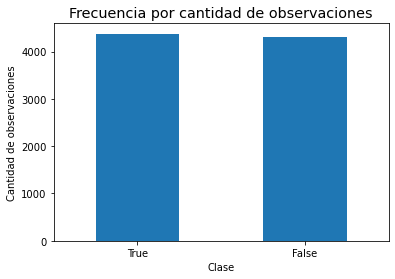

In [23]:
count_classes = pd.value_counts(df['Transported'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Frecuencia por cantidad de observaciones", fontsize='x-large')
plt.xlabel("Clase")
plt.ylabel("Cantidad de observaciones");

Se observa que la variable a predecir esta balanceada, por lo cual no tendremos problemas para seguir con los modelos de prediccion.

<a id="ref3"></a>
# 3) **Depuración de los datos**
* <p><a href ="#ref7"> <font color=orange size=3> Inicio </font> </a></p>

## Valores Nulos

Los valores ausentes son muy importantes a la hora de crear modelos, algunos algoritmos no aceptan observaciones incompletas o bien se ven muy influenciados por ellas. Aunque la imputación de valores ausentes es parte del preprocesado y, por lo tanto, debe de aprenderse únicamente con los datos de entrenamiento, su identificación se tiene que realizar antes de separar los datos para asegurar que se establecen todas las estrategias de imputación necesarias. Para efectos de este ejercicio vamos a excluir los Valores ausentes o nulos con porcentajes mayor del 20%.

In [13]:
df.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [23]:
# how many total missing values do we have?
total_cells = np.product(df.shape)
total_missing = df.isna().sum().sum()

# percent of data that is missing
print('Porcentaje de valores en nulo en todo el dataframe:',"{:.0%}".format(total_missing/total_cells))

Porcentaje de valores en nulo: 2%


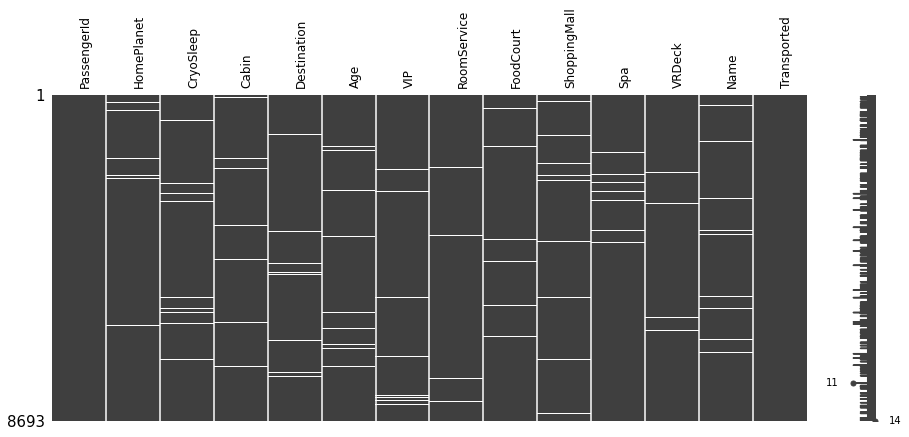

In [27]:
#usamos sample porque da error con todo el datas
ax = msno.matrix(df,figsize=(15, 6),fontsize=12)
ax.tick_params('x', rotation=90)

En este grafico podemos observar si existe sistematicidad en la perdida de datos, es decir si coinciden los "blancos" entre varias variables. Antes de tomar una decision respecto a los datos nulos, veamos como influye cada variable en la distribucion de la variable target. 

# 4) Análisis exploratorio y descriptivo

In [41]:
df['Transported'] = df['Transported'].astype('object')

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   object 
dtypes: float64(6), object(8)
memory usage: 950.9+ KB


In [46]:
df.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')

In [50]:
# Ahora si con la función discribe miro los principales indicadores estadisticos de cada variable numerica 
#en funcion a la variable target
df.groupby('Transported')[ 'Age','RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'].describe().T

Transported           False     True
Age          count  4226.00  4288.00
             mean     29.92    27.75
             std      13.70    15.15
             min       0.00     0.00
             25%      21.00    18.00
             50%      27.00    26.00
             75%      38.00    37.00
             max      79.00    78.00
RoomService  count  4217.00  4295.00
             mean    389.27    63.10
             std     875.64   274.81
             min       0.00     0.00
             25%       0.00     0.00
             50%       1.00     0.00
             75%     473.00     0.00
             max   14327.00  3992.00
FoodCourt    count  4231.00  4279.00
             mean    382.62   532.69
             std    1200.12  1931.31
             min       0.00     0.00
             25%       0.00     0.00
             50%       0.00     0.00
             75%     179.00     0.00
             max   16856.00 29813.00
ShoppingMall count  4221.00  4264.00
             mean    167.57   179.83
             std     456.53   722.03
             min       0.00     0.00
             25%       0.00     0.00
             50%       0.00     0.00
             75%      95.00     0.00
             max   10705.00 23492.00
Spa          count  4223.00  4287.00
             mean    564.38    61.68
             std    1551.36   262.68
             min       0.00     0.00
             25%       0.00     0.00
             50%       4.00     0.00
             75%     453.50     0.00
             max   22408.00  4103.00
VRDeck       count  4225.00  4280.00
             mean    543.63    69.15
             std    1563.09   291.66
             min       0.00     0.00
             25%       0.00     0.00
             50%       1.00     0.00
             75%     388.00     0.00
             max   24133.00  5063.00

### Edad

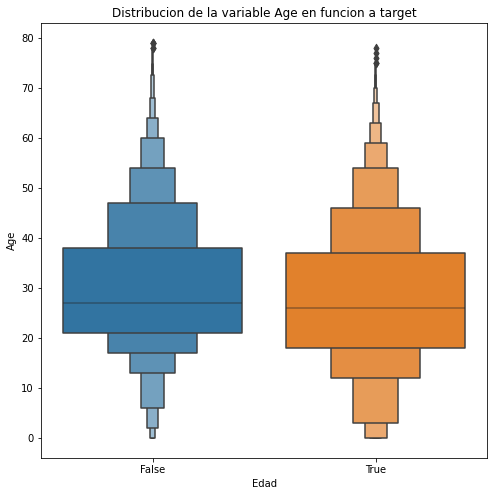

In [51]:
plt.figure(figsize=(8,8))
sns.boxenplot(data=df, y='Age', x='Transported')
plt.xlabel('Edad')
plt.title('Distribucion de la variable Age en funcion a target')
plt.show()

No parece que la edad sea una variable influyente en la determinacion de si el pasajero sera trasladado o no al espacio.

Probamos transformando la variable edad a categorica.

In [71]:
def to_categorical(column, bin_size=10, min_cut=20, max_cut=70):
    if min_cut is None:
        min_cut = int(round(column.min())) - 1
    value_max = int(np.ceil(column.max()))
    max_cut = min(max_cut, value_max)
    intervals = [(x, x + bin_size) for x in range(min_cut, max_cut, bin_size)]
    if max_cut != value_max:
        intervals.append((max_cut, value_max))
    print(intervals)
    return pd.cut(column, pd.IntervalIndex.from_tuples(intervals))
    if min_cut is None:
        min_cut = int(round(column.min())) - 1
    value_max = int(np.ceil(column.max()))
    max_cut = min(max_cut, value_max)
    intervals = [(x, x + bin_size) for x in range(min_cut, max_cut, bin_size)]
    if max_cut != value_max:
        intervals.append((max_cut, value_max))
    print(intervals)
    return pd.cut(column, pd.IntervalIndex.from_tuples(intervals))

In [72]:
df['Age_cat'] = to_categorical(df.Age,bin_size=10, min_cut=20, max_cut=70)
df['Age_cat'].value_counts()

[(20, 30), (30, 40), (40, 50), (50, 60), (60, 70), (70, 79)]


(20, 30]    2668
(30, 40]    1680
(40, 50]     994
(50, 60]     517
(60, 70]     183
(70, 79]      37
Name: Age_cat, dtype: int64

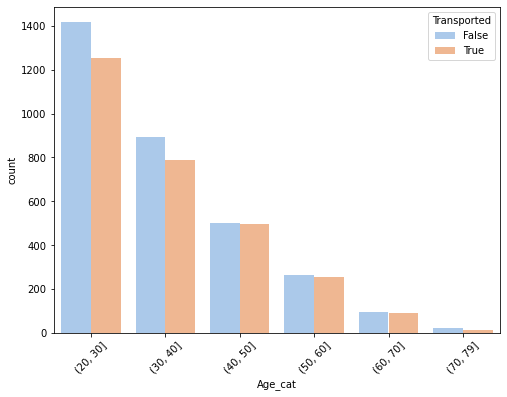

In [74]:
fig, ax = plt.subplots(figsize=(8,6))
sns.countplot(df.Age_cat,hue=df.Transported, palette="pastel")
ax.tick_params('x', rotation=45)

Podriamos decir que entre los 20 y 40 anios hay menor cantidad de pasajeros transportados, pero en muy poca cantidad, luego de ese rango etaria la proporcion es identica.

### RoomService, FoodCourt, ShoppingMall,Spa, VRDeck

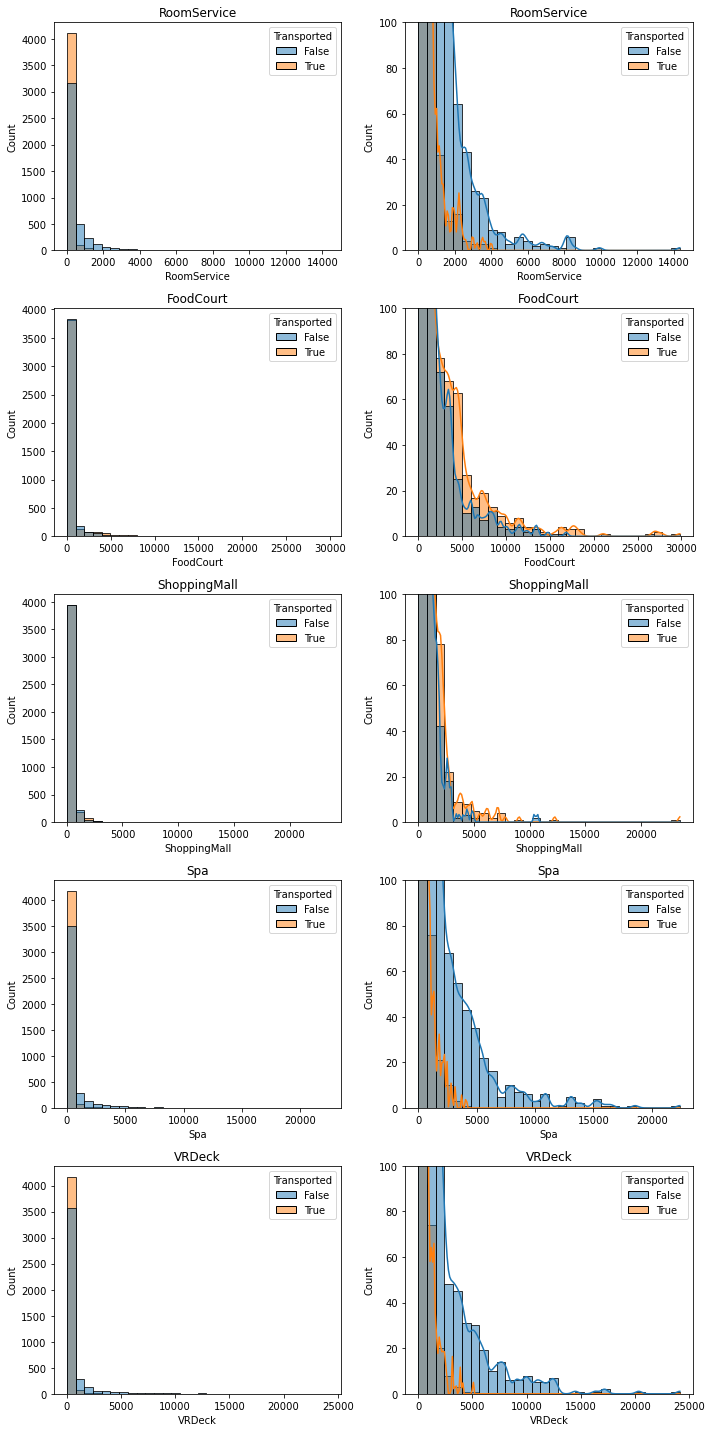

In [76]:
# Expenditure features
var_num=['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

# Plot expenditure features
fig=plt.figure(figsize=(10,20))
for i, var_name in enumerate(var_num):
    # Left plot
    ax=fig.add_subplot(5,2,2*i+1)
    sns.histplot(data=df, x=var_name, axes=ax, bins=30, kde=False, hue='Transported')
    ax.set_title(var_name)
    
    # Right plot (truncated)
    ax=fig.add_subplot(5,2,2*i+2)
    sns.histplot(data=df, x=var_name, axes=ax, bins=30, kde=True, hue='Transported')
    plt.ylim([0,100])
    ax.set_title(var_name)
fig.tight_layout()  # Improves appearance a bit
plt.show()

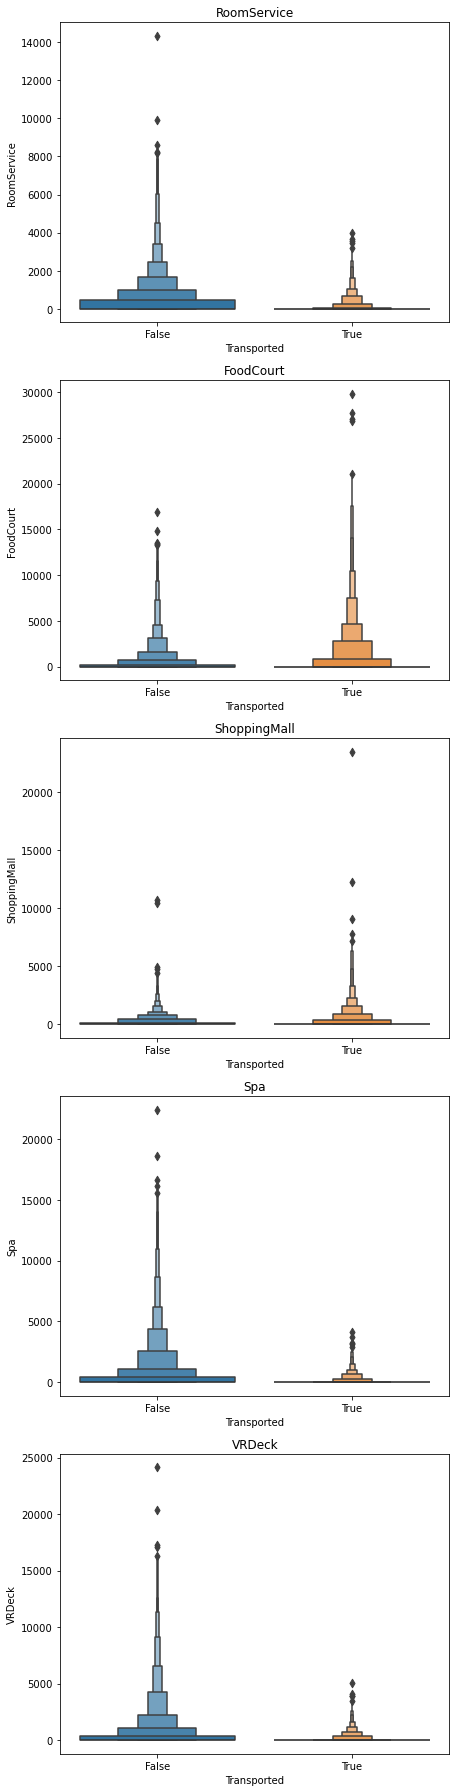

In [85]:
# Expenditure features
var_num=['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

# Plot expenditure features
fig=plt.figure(figsize=(12,25))
for i, var_name in enumerate(var_num):
    # Left plot
    ax=fig.add_subplot(5,2,2*i+1)
    sns.boxenplot(data=df, y=var_name, axes=ax,x='Transported')
    ax.set_title(var_name)
    
fig.tight_layout()  # Improves appearance a bit
plt.show()

Pareciera que los pasajeros que no son transportados gastan mas en RoomService, Spa y VRDeck.

### HomePlanet

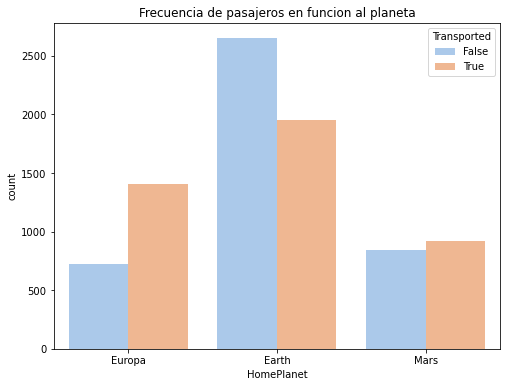

In [94]:
fig = plt.figure(figsize=(8,6))
sns.countplot(df.HomePlanet, hue=df.Transported, palette="pastel")
plt.title("Frecuencia de pasajeros en funcion al planeta")
plt.show()

Si el pasajero viene de Europa es mas probable que sea transportado, mientras que si viene de la tierra es menor la probabilidad, si viene de Marte la probabilidad es 50/50.

### CryoSleep

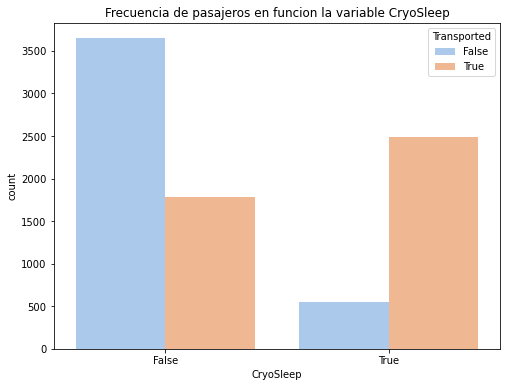

In [99]:
fig = plt.figure(figsize=(8,6))
sns.countplot(df.CryoSleep, hue=df.Transported, palette="pastel")
plt.title("Frecuencia de pasajeros en funcion la variable CryoSleep")
plt.show()

Aquellos pasajeros que eligieron entrar en suspension fueron traslados en su mayoria y viceversa, esta variable es muy influyente.

### Destination

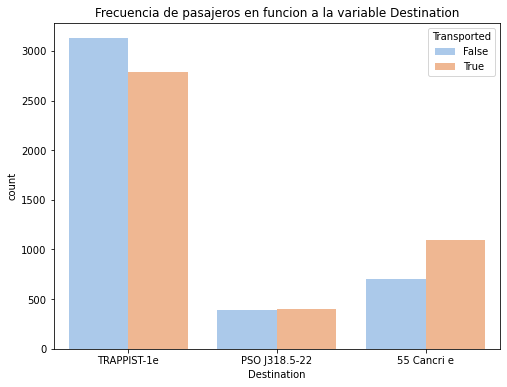

In [100]:
fig = plt.figure(figsize=(8,6))
sns.countplot(df.Destination, hue=df.Transported, palette="pastel")
plt.title("Frecuencia de pasajeros en funcion a la variable Destination")
plt.show()

### VIP

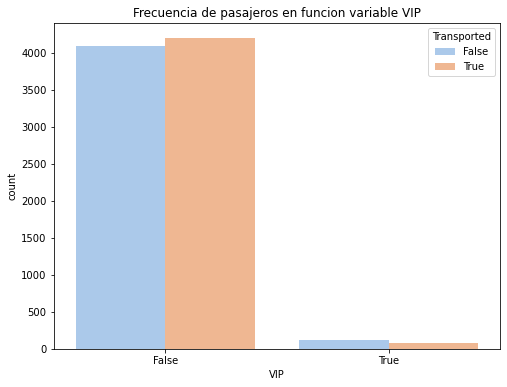

In [98]:
fig = plt.figure(figsize=(8,6))
sns.countplot(df.VIP, hue=df.Transported, palette="pastel")
plt.title("Frecuencia de pasajeros en funcion variable VIP")
plt.show()

Casi todos los pasajeros que pagaron por servicio VIP fueron traslados y los que no, no fueron traslados.

# 5) Feature engineering

A partir del id del pasajero obtener si viajo o no con la familia y analizar si esta variable influye o no

# 6) Preparado de los datos para los modelos

Aca deberiamos tomar una decision sobre los datos nulos, seleccionar variables, aplicar Onehotencoding a las variables categoricas

In [105]:
df.dtypes=='object' == True

PassengerId      True
HomePlanet       True
CryoSleep        True
Cabin            True
Destination      True
Age             False
VIP              True
RoomService     False
FoodCourt       False
ShoppingMall    False
Spa             False
VRDeck          False
Name             True
Transported      True
Age_cat_        False
Age_cat         False
dtype: bool

In [ ]:
categorical_cols = [
    "
]
numerical_cols = [
    ""
]

In [ ]:
ohe = preprocessing.OneHotEncoder(sparse=False)
feature_matrix_ohe = np.hstack([
    ohe.fit_transform(df[categorical_cols]),
    df[numerical_cols]
])
feature_matrix_ohe.shape